In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob 
from numpy.linalg import eig
import seaborn as sns
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
sns.set()
%matplotlib inline

In [2]:
#Get adjusting closing prices from each {sector}.csv file

df = pd.concat([pd.read_csv(f, usecols=[0,5], index_col = [0]) for f in glob.glob('*.csv')], ignore_index = True, axis = 1)

In [3]:
#Change column names to sector names
labels = [ f[0:3] for f in glob.glob('*.csv') ]
df.columns = labels


#Create dictionary mapping tickers to names


In [6]:
ret = df.pct_change().dropna()
ret.head()

,XLP,XLI,XLY,XLE,XLU,XLF,XLK,XLV,XLB
Date,,,,,,,,,
1998-12-23,0.024174,0.017452,0.004294,0.020820,-0.004191,0.014743,0.023893,0.022472,0.010504
1998-12-24,-0.001727,0.013193,0.018327,-0.005263,0.018412,0.006607,-0.003810,0.006107,0.023014
1998-12-28,-0.005767,0.005208,-0.008999,-0.005291,-0.005167,-0.013123,0.002867,-0.014563,-0.008709
1998-12-29,0.022042,0.014247,0.021792,0.009973,0.016615,0.010638,0.002861,0.022167,0.018302
1998-12-30,-0.006243,-0.004471,-0.008294,-0.015142,-0.008172,-0.003949,-0.003802,-0.008436,-0.002876


In [14]:
## Get Eigenvectors and Eigenvalues
def get_eig(returns: pd.DataFrame) -> np.array()
    return eig(ret.cov())

get_eig(ret)

(array([  1.22907821e-03,   1.77977112e-04,   1.26336151e-04,
          9.36324732e-05,   8.17029252e-05,   2.69786101e-05,
          5.50657106e-05,   3.72101497e-05,   4.44510747e-05]),
 array([[ 0.18224429, -0.00686116,  0.02709067, -0.37987377,  0.22940792,
         -0.08153579, -0.31360949, -0.79619413, -0.17363719],
        [ 0.3429668 ,  0.04742317, -0.0904603 ,  0.07419323,  0.22988253,
          0.90100327,  0.03262582,  0.00641568, -0.02605067],
        [ 0.34443355,  0.19562938, -0.04537387, -0.00358968,  0.29635176,
         -0.23271632, -0.28874892,  0.44170493, -0.64850796],
        [ 0.36592793, -0.76377526, -0.00374225,  0.19898568, -0.39719585,
         -0.00691412, -0.27937528,  0.01004817, -0.08468138],
        [ 0.21317937, -0.17945527, -0.08793246, -0.81314346, -0.14847009,
          0.00661177,  0.41989757,  0.23276544, -0.02889896],
        [ 0.47385728,  0.34301962,  0.73710623,  0.0492172 , -0.29013107,
         -0.05331697,  0.08060936, -0.03165582,  0.1324016

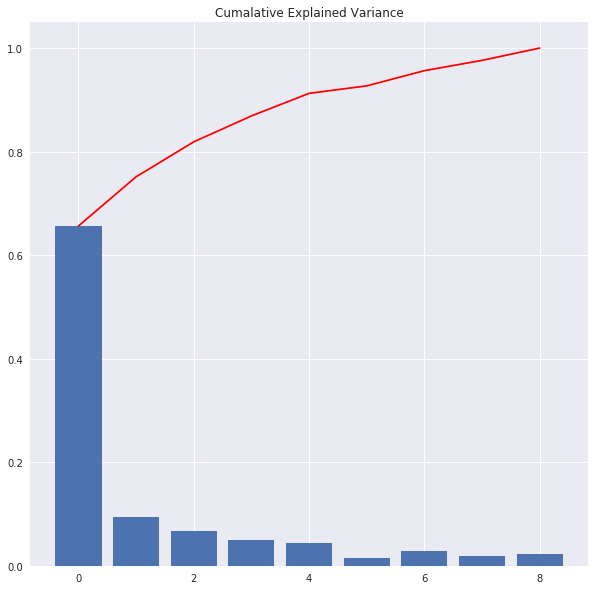

In [8]:
## Plot eigen values (percentage of explained variance) and the cumulative explained variance

x = list(range(len(eig_val)))
y = [x / sum(eig_val) for x in eig_val]

plt.figure(figsize =(10,10))
plt.bar(x, y)
plt.plot(np.cumsum(y), color = 'r')
plt.title("Cumalative Explained Variance")

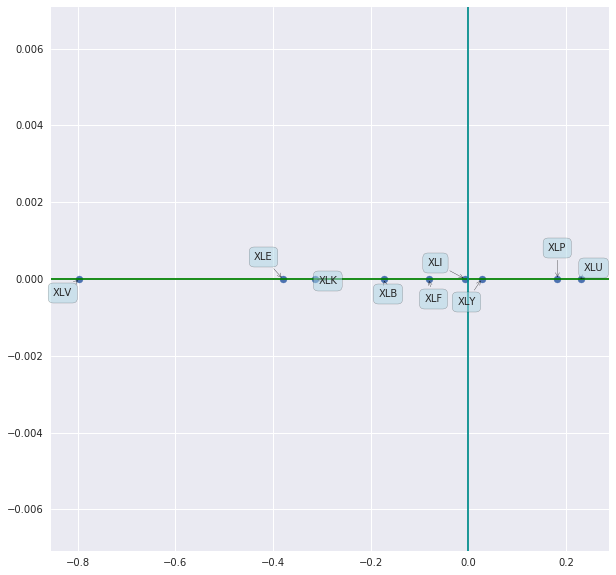

In [9]:
#project eigenvectors in 1-d
y1 = eig_vec[0,:]

plt.figure(figsize =(10,10))
plt.scatter(y1, [0]*9, marker = 'o')
plt.axhline(y = 0, color = 'g')
plt.axvline(x = 0, color = 'darkcyan')

for label, x_, y_ in zip(labels, y1, [0]*9):
    plt.annotate(
        label,
        xy=(x_, y_), xytext=(np.random.randint(low =-30, high =30), np.random.randint(low =-30, high =30)),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

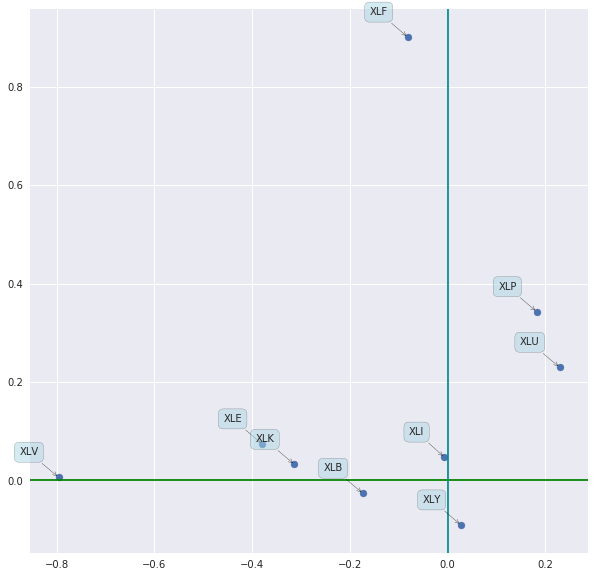

In [10]:
#project eigenvectors in 2-d
y1 = eig_vec[0,:]
y2 = eig_vec[1,:]

plt.figure(figsize =(10,10))
plt.scatter(y1, y2, marker = 'o')
plt.axhline(y = 0, color = 'g')
plt.axvline(x = 0, color = 'darkcyan')

for label, x_, y_ in zip(labels, y1, y2):
    plt.annotate(
        label,
        xy=(x_, y_), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

In [11]:
## Interactive covariance
def eig_vec_calc(returns, window, start = 0):
    eig_val, _ = eig(returns.iloc[start:start+window,:].cov())
    x = list(range(len(eig_val)))
    y = [x / sum(eig_val) for x in eig_val]
    plt.figure(figsize =(10,10))
    plt.bar(x, y)
    plt.title('Date: {} - {}'.format(returns.index[start], returns.index[start+window]))

In [12]:
interact(eig_vec_calc, returns = fixed(ret), window = (30,300,10), start = (0,4800,100))

A Jupyter Widget

<function __main__.eig_vec_calc>

In [ ]:
#idx = np.argsort(evals)[::-1]
#evecs = evecs[:,idx]
#evals = evals[idx]|

In [ ]:
cov = ret.cov()
cov

In [ ]:
w = np.random.randn(9)
np.dot(w.T,cov)